<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_26_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
Agriculture plays a predominant role in the economy and employment of a country. The common problem existing among the farmers is they don't choose the right crop based on their soil requirements. Due to this, they face a serious setback in productivity. This problem of the farmers has been addressed through precision agriculture. 


**Precision agriculture** is a modern farming technique that uses research data of soil characteristics, soil types, crop yield data collection and suggests the farmers the right crop based on their site-specific parameters. This reduces the wrong choice when it comes to crop selection, and also increases productivity.

## Objective
Build a Machine Learning model to predict the most suitable crop to grow on a particular farm.

## Evaluation Criteria
**Accuracy_Score**

## Data Description

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorus content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm
* crop - Suitable crop to grow **(target variable)**

## Loading Libraries

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")
#
%matplotlib inline

## Loading Dataset

**Training Data**

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

**Testing Dataset**

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

**Summary Statistics of Training Data**

In [4]:
train_data.head()

N      P      K  temperature   humidity        ph    rainfall      crop
0   17.0  136.0  196.0    23.871923  90.499390  5.882156  103.054809     apple
1   49.0   69.0   82.0    18.315615  15.361435  7.263119   81.787105  chickpea
2   74.0   49.0   38.0    23.314104  71.450905  7.488014  164.497037      jute
3  104.0   35.0   28.0    27.510061  50.666872  6.983732  143.995555    coffee
4   23.0   72.0   84.0    19.020613  17.131591  6.920251   79.926981  chickpea

In [5]:
train_data.shape,test_data.shape

((1650, 8), (550, 7))

In [6]:
train_data.describe(include='all')

N            P            K  ...           ph     rainfall    crop
count   1650.000000  1650.000000  1650.000000  ...  1650.000000  1650.000000    1650
unique          NaN          NaN          NaN  ...          NaN          NaN      22
top             NaN          NaN          NaN  ...          NaN          NaN  coffee
freq            NaN          NaN          NaN  ...          NaN          NaN      75
mean      50.370308    53.419241    48.111081  ...     6.485583   103.965778     NaN
std       36.743966    33.320501    50.537044  ...     0.765865    55.510324     NaN
min        0.000000     5.000000     5.000000  ...     3.525366    20.360011     NaN
25%       21.000000    27.000000    20.552276  ...     5.986160    65.025621     NaN
50%       37.000000    52.000000    31.575398  ...     6.426118    95.246217     NaN
75%       84.738202    68.000000    49.000000  ...     6.924943   127.887636     NaN
max      136.000000   145.000000   205.000000  ...     9.935091   298.560117     NaN

[11 rows x 8 columns]

**Check if the labales are distributed in same proportion**

In [7]:
train_data.crop.value_counts(normalize=True)

coffee         0.045455
chickpea       0.045455
papaya         0.045455
banana         0.045455
apple          0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
kidneybeans    0.045455
mungbean       0.045455
muskmelon      0.045455
maize          0.045455
blackgram      0.045455
jute           0.045455
rice           0.045455
lentil         0.045455
cotton         0.045455
coconut        0.045455
pigeonpeas     0.045455
mothbeans      0.045455
orange         0.045455
pomegranate    0.045455
Name: crop, dtype: float64

**Check for missing values**

In [8]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

**Pandas Profiling**

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 11.5MB/s 
     |████████████████████████████████| 3.1MB 15.5MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 604kB 40.5MB/s 
     |████████████████████████████████| 296kB 43.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=6937bca485d5c59ca5fae21d045a4916b03903cc2f84576dbe9b51732a47a16e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=73d0b945e4fab690de2c8cfc8d09d5fdd71f53484a7f74ab9647d29825185280
  Stored in directory: /root/.cache/pip/wheels/0e/c8/42/68bc8b9d86a040d84c1c76fa0104f6e0c89754595843093525
Successfully built htmlmin phik
ERROR: phik 0.11.1 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data, title='Pandas Profiling Report for Crop Recommendation training data')

In [ ]:
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**EDA**

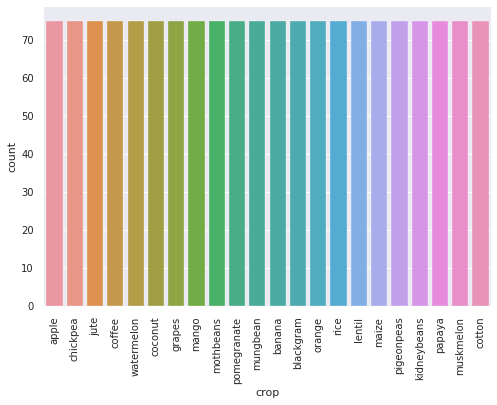

In [ ]:
sns.set_style('darkgrid')
plt.xticks(rotation=90)
sns.countplot(train_data['crop'])

In [ ]:
train_data['crop'].nunique()

22

## Label Encoding

In [10]:
label_dict ={k:v for v,k in enumerate(train_data['crop'].unique())}

In [11]:
label_dict

{'apple': 0,
 'banana': 11,
 'blackgram': 12,
 'chickpea': 1,
 'coconut': 5,
 'coffee': 3,
 'cotton': 21,
 'grapes': 6,
 'jute': 2,
 'kidneybeans': 18,
 'lentil': 15,
 'maize': 16,
 'mango': 7,
 'mothbeans': 8,
 'mungbean': 10,
 'muskmelon': 20,
 'orange': 13,
 'papaya': 19,
 'pigeonpeas': 17,
 'pomegranate': 9,
 'rice': 14,
 'watermelon': 4}

In [12]:
train_data['crop'] = train_data['crop'].map(label_dict)

In [13]:
train_data.head()

N      P      K  temperature   humidity        ph    rainfall  crop
0   17.0  136.0  196.0    23.871923  90.499390  5.882156  103.054809     0
1   49.0   69.0   82.0    18.315615  15.361435  7.263119   81.787105     1
2   74.0   49.0   38.0    23.314104  71.450905  7.488014  164.497037     2
3  104.0   35.0   28.0    27.510061  50.666872  6.983732  143.995555     3
4   23.0   72.0   84.0    19.020613  17.131591  6.920251   79.926981     1

## Correlation Plot

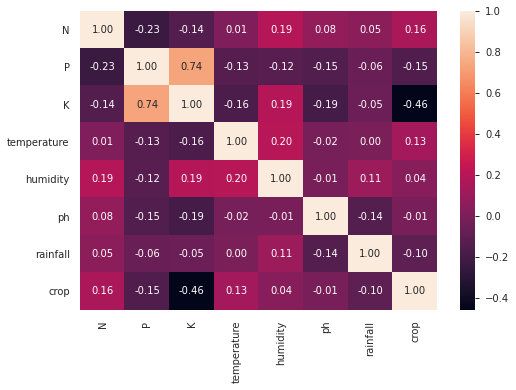

In [ ]:
sns.heatmap(train_data.corr(),annot=True,fmt=".2f")

## Preparing Models

In [13]:
!pip install tpot

     |████████████████████████████████| 92kB 4.0MB/s 
     |████████████████████████████████| 163kB 11.8MB/s 
     |████████████████████████████████| 157.5MB 44kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=37252ef9b8a67fe2b7459e0fe3933ddd0d564ee74f8cc4641336e94f6d06ecac
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## Normalize the training data

In [14]:
X = train_data.drop('crop',axis=1)
Y = train_data['crop']

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [16]:
X_scaled

array([[-0.90846002,  2.47912826,  2.92723399, ...,  0.85331586,
        -0.78814091, -0.01641577],
       [-0.03730471,  0.46774455,  0.67077909, ..., -2.53258807,
         1.01554583, -0.39966254],
       [ 0.64328537, -0.1326685 , -0.20013333, ..., -0.00505646,
         1.30928419,  1.09078106],
       ...,
       [-0.41843516,  2.4491076 ,  2.98661439, ...,  0.40494559,
        -0.11084045, -0.62294636],
       [ 1.26942825, -0.55295763, -0.4376549 , ..., -0.80308886,
        -0.19718662,  1.12245852],
       [-0.83589536, -0.00592625, -0.52561053, ...,  0.43238021,
         0.43249092, -1.10892993]])

In [17]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_scaled,train_data['crop'].values,test_size=0.2,random_state=42)

In [18]:
x_train

array([[-0.44399741,  0.08626159, -0.59479469, ...,  0.70330432,
         0.32151266, -0.84788558],
       [-0.42640213,  0.46408046,  0.61839916, ..., -2.49717508,
         0.84894558, -0.52697485],
       [-0.52732957,  2.71929348,  3.04599478, ...,  0.40522258,
        -0.80323347, -0.64378974],
       ...,
       [-0.4959153 , -0.46289568, -0.56084547, ..., -0.43207476,
         3.12385152, -1.27348707],
       [-1.09902524,  0.73793042, -0.59600261, ..., -0.3991068 ,
        -0.24633984, -1.07918189],
       [ 1.32387545,  0.10749672, -0.25951372, ...,  0.43324099,
        -0.68598486,  3.03340258]])

In [19]:
y_train

array([10,  1,  6, ...,  8, 15, 14])

## Implementing TPOT Classifier

In [20]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

## 1st run of Tpot Classifier 

In [ ]:
tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9939393939393939

Generation 2 - Current best internal CV score: 0.9939393939393939

Generation 3 - Current best internal CV score: 0.9939393939393939

Generation 4 - Current best internal CV score: 0.9939393939393939

Generation 5 - Current best internal CV score: 0.9939393939393939

Generation 6 - Current best internal CV score: 0.9939393939393939

Generation 7 - Current best internal CV score: 0.9939393939393939

Generation 8 - Current best internal CV score: 0.9939393939393939

Generation 9 - Current best internal CV score: 0.9939393939393939

Generation 10 - Current best internal CV score: 0.9939393939393939

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=True, early_stop=None, generations=10,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot_acc_score = accuracy_score(y_test, tpot.predict(x_test))
print(f'\nAUC score: {tpot_acc_score:.4f}')


AUC score: 0.9939


## The best Model

In [ ]:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')


Best pipeline steps:
1. GaussianNB(priors=None, var_smoothing=1e-09)


## Confusion Matrix

In [ ]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

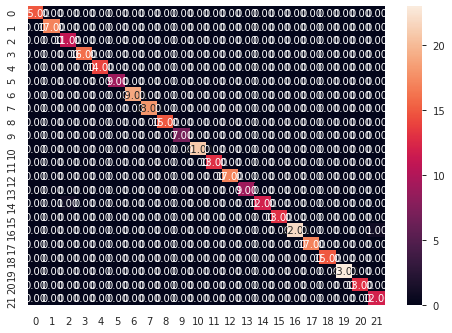

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cf = confusion_matrix(y_test, tpot.predict(x_test))
sns.heatmap(cf,annot=True,fmt=".2f")

## 2nd run of tpot Classifier

In [21]:
tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.9939393939393939

Generation 2 - Current best internal CV score: 0.9939393939393939

Generation 3 - Current best internal CV score: 0.9939393939393939

Generation 4 - Current best internal CV score: 0.9939393939393939

Generation 5 - Current best internal CV score: 0.9939393939393939

Generation 6 - Current best internal CV score: 0.9939393939393939

Generation 7 - Current best internal CV score: 0.9939393939393939

Generation 8 - Current best internal CV score: 0.9939393939393939

Generation 9 - Current best internal CV score: 0.9939393939393939

Generation 10 - Current best internal CV score: 0.9939393939393939

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=True, early_stop=None, generations=10,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [22]:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')


Best pipeline steps:
1. GaussianNB(priors=None, var_smoothing=1e-09)


## Prepare Test Data for predictions

In [40]:
X_test_scaled=sc.transform(test_data)
X_test_scaled

array([[-0.772342  , -0.0726272 , -0.63558954, ..., -0.46027349,
         2.81336173, -0.6101806 ],
       [ 2.17344   ,  0.1737496 , -0.58440009, ...,  0.48635993,
         0.28995565, -0.22586043],
       [-0.60900038, -0.79312285, -0.27930718, ..., -0.94028208,
         0.05364378, -0.1606866 ],
       ...,
       [-0.58689369, -1.03516895, -0.34364804, ...,  1.07745317,
        -0.99978249,  0.7089302 ],
       [-0.45493235,  2.26579439,  3.1009525 , ...,  0.95786092,
        -0.56434796,  0.07180218],
       [-0.58177678, -0.52293698, -0.45744836, ...,  0.76048746,
         0.84204254, -0.99829485]])

In [ ]:
y_test_pred = tpot.fitted_pipeline_.predict(X_test_scaled)

In [ ]:
y_test_pred

array([ 8, 21,  7, 15, 10,  3, 15, 21, 15, 15,  2,  8, 13, 11,  5, 20,  6,
        3,  4, 10,  5, 14,  8, 16,  0, 13, 14,  4,  9,  8, 18, 10, 11, 19,
       12,  1, 18,  5, 15, 19,  6,  6, 14,  1,  6, 17,  4, 17,  4,  7, 16,
        7,  6, 17, 14, 18,  0,  5,  4,  0, 10,  3,  4, 10,  0, 18, 13,  6,
        4,  5, 16,  9, 21,  0, 16,  2,  8, 21, 21, 17, 17,  8, 11,  0, 18,
       21, 11,  1,  0, 16,  6, 13,  9, 12,  4,  8,  6,  0,  1, 13, 13, 20,
        5,  2, 13, 21, 17, 21, 21,  7,  9,  1, 16,  8,  3, 18, 11,  5, 15,
        2, 12,  3, 18, 10, 21, 19,  4,  5, 19, 12, 14,  8, 20,  8,  2, 10,
        9, 17,  3,  3,  7,  2,  2, 21,  1,  1, 19,  8, 13,  0,  3, 10, 16,
        1, 12, 15, 13, 18,  9, 19, 12,  7,  9,  2, 17,  8,  1, 20,  1, 15,
        7,  5, 11,  3, 14,  7,  4,  4,  2,  5, 17, 19, 14, 13, 21, 12, 17,
        7,  7, 12,  2, 13, 19, 16, 16, 21, 19, 20,  0,  3,  5,  4, 20, 20,
        5,  1, 16, 10, 21, 20,  8, 14, 15, 14, 18,  6, 17, 15,  2,  6, 16,
       16, 20,  7, 10, 11

In [ ]:
label_dict

{'apple': 0,
 'banana': 11,
 'blackgram': 12,
 'chickpea': 1,
 'coconut': 5,
 'coffee': 3,
 'cotton': 21,
 'grapes': 6,
 'jute': 2,
 'kidneybeans': 18,
 'lentil': 15,
 'maize': 16,
 'mango': 7,
 'mothbeans': 8,
 'mungbean': 10,
 'muskmelon': 20,
 'orange': 13,
 'papaya': 19,
 'pigeonpeas': 17,
 'pomegranate': 9,
 'rice': 14,
 'watermelon': 4}

In [42]:
inv_label_dict = {v:k for k,v in label_dict.items() }

In [43]:
inv_label_dict

{0: 'apple',
 1: 'chickpea',
 2: 'jute',
 3: 'coffee',
 4: 'watermelon',
 5: 'coconut',
 6: 'grapes',
 7: 'mango',
 8: 'mothbeans',
 9: 'pomegranate',
 10: 'mungbean',
 11: 'banana',
 12: 'blackgram',
 13: 'orange',
 14: 'rice',
 15: 'lentil',
 16: 'maize',
 17: 'pigeonpeas',
 18: 'kidneybeans',
 19: 'papaya',
 20: 'muskmelon',
 21: 'cotton'}

In [47]:
sub = pd.DataFrame()

In [54]:
sub['prediction'] = predictions

In [55]:
sub['prediction'] = sub['prediction'].map(inv_label_dict)

In [56]:
sub['prediction'].nunique()

22

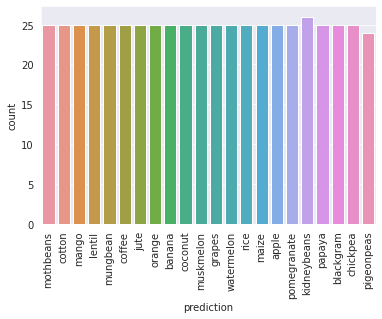

In [57]:
sns.set_style('darkgrid')
plt.xticks(rotation=90)
sns.countplot(sub['prediction'])

In [58]:
sub.to_csv("catboostclassifier.csv",index=False)

**TPOTClassifier Submission Scores : 99.63636363636364**

## Using CatBoostClassifier

In [19]:
!pip install catboost

     |████████████████████████████████| 65.7MB 85kB/s 


## Hyperparameter optimization using hperopt

In [20]:
!pip install hyperopt

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
#
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial
from sklearn.metrics import f1_score
#
from sklearn.model_selection import StratifiedKFold

In [22]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = CatBoostClassifier(**params,eval_metric='AUC',auto_class_weights='Balanced')
  #model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x.iloc[train_idx],x.iloc[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain)
    #model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

## Parameter space for CatBoostClassifier

In [24]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.choice("max_depth", [3,5,7,8])),
#CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.
#"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"learning_rate": hp.loguniform('learning_rate', -5.0, -2),
# uniform chooses a value between two values
"random_state": scope.int(hp.quniform("random_state", 40, 100,10)),
"num_boost_round": scope.int(hp.choice("num_boost_round", [500,1000,2000,3000]))
}

In [25]:
param_space

{'learning_rate': <hyperopt.pyll.base.Apply at 0x7f76d1f41ad0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f76d1f41b10>,
 'num_boost_round': <hyperopt.pyll.base.Apply at 0x7f76d1f413d0>,
 'random_state': <hyperopt.pyll.base.Apply at 0x7f76d1f41f10>}

In [26]:
x = train_data.drop('crop',axis=1)

In [27]:
x.head()

N      P      K  temperature   humidity        ph    rainfall
0   17.0  136.0  196.0    23.871923  90.499390  5.882156  103.054809
1   49.0   69.0   82.0    18.315615  15.361435  7.263119   81.787105
2   74.0   49.0   38.0    23.314104  71.450905  7.488014  164.497037
3  104.0   35.0   28.0    27.510061  50.666872  6.983732  143.995555
4   23.0   72.0   84.0    19.020613  17.131591  6.920251   79.926981

In [28]:
X = pd.DataFrame(X_scaled,columns = x.columns)
Y = train_data['crop']

In [47]:
param_space

{'learning_rate': <hyperopt.pyll.base.Apply at 0x7fe20ead9990>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fe20ead9910>,
 'num_boost_round': <hyperopt.pyll.base.Apply at 0x7fe20ead9650>,
 'random_state': <hyperopt.pyll.base.Apply at 0x7fe20ead9710>}

## HyperParameter optimization using hyperopt

In [29]:
# partial function
optimization_function = partial(optimize,x=X,y=Y)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

Streaming output truncated to the last 5000 lines.

1:	total: 176ms	remaining: 43.8s

2:	total: 266ms	remaining: 44.1s

3:	total: 366ms	remaining: 45.3s

4:	total: 461ms	remaining: 45.7s

5:	total: 551ms	remaining: 45.4s

6:	total: 648ms	remaining: 45.7s

7:	total: 742ms	remaining: 45.6s

8:	total: 833ms	remaining: 45.4s

9:	total: 929ms	remaining: 45.5s

10:	total: 1.02s	remaining: 45.5s

11:	total: 1.13s	remaining: 45.8s

12:	total: 1.21s	remaining: 45.5s

13:	total: 1.31s	remaining: 45.4s

14:	total: 1.4s	remaining: 45.2s

15:	total: 1.49s	remaining: 45.1s

16:	total: 1.59s	remaining: 45.1s

17:	total: 1.69s	remaining: 45.2s

18:	total: 1.78s	remaining: 45.1s

19:	total: 1.87s	remaining: 44.9s

20:	total: 1.97s	remaining: 44.9s

21:	total: 2.06s	remaining: 44.9s

22:	total: 2.15s	remaining: 44.7s

23:	total: 2.25s	remaining: 44.6s

24:	total: 2.34s	remaining: 44.4s

25:	total: 2.43s	remaining: 44.4s

26:	total: 2.52s	remaining: 44.2s

27:	total: 2.61s	remaining: 44.1s

28:	total: 2.

In [30]:
print(f" parameters for CatBoostClassifier {hopt}")

 parameters for CatBoostClassifier {'learning_rate': 0.03095787902012726, 'max_depth': 0, 'num_boost_round': 1, 'random_state': 50.0}


Running 1 iteration
0.9915151515151515
0.9927272727272727
Running 2 iteration
0.9951515151515151
0.9903030303030304
Running 3 iteration
0.9939393939393939
0.9939393939393939
Running 4 iteration
0.9939393939393939
0.9915151515151515
Running 5 iteration
0.9915151515151515
0.9927272727272727
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9903030303030304 0.9951515151515151 0.9927272727272728


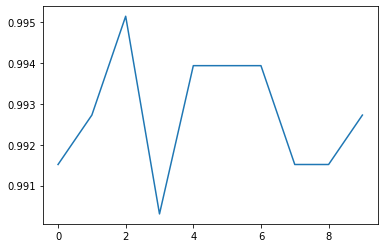

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=6,
                                   random_state=50,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=3000,verbose=0)
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(accuracy_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [35]:
model = CatBoostClassifier(max_depth=6,
                                   random_state=50,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=3000,verbose=0)

In [36]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

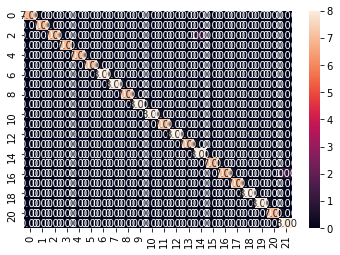

In [37]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f")

In [38]:
f1_score(y_test,y_pred,average='weighted')

0.9878312537136067

In [39]:
accuracy_score(y_test,y_pred)

0.9878787878787879

In [50]:
ytest_pred = model.predict(X_test_scaled)

In [53]:
predictions = [ pred[0] for pred in ytest_pred]

**Submission Scores : 99.45454545454545**